# Chapter 4

In [1]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.7, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan

Loading required package: parallel

rethinking (Version 2.21)


Attaching package: ‘rethinking’


The following object is masked from ‘package:rstan’:

    stan


The following object is masked from ‘package:stats’:

    rstudent




Easy ones are answered verbally

### 4M1.
For the model definition below, simulate observed y values from the prior (not the posterior).

yi ∼ Normal(µ, σ)

µ ∼ Normal(0, 10)

σ ∼ Exponential(1)

In [2]:
mu <- rnorm(1e4, 0, 10)

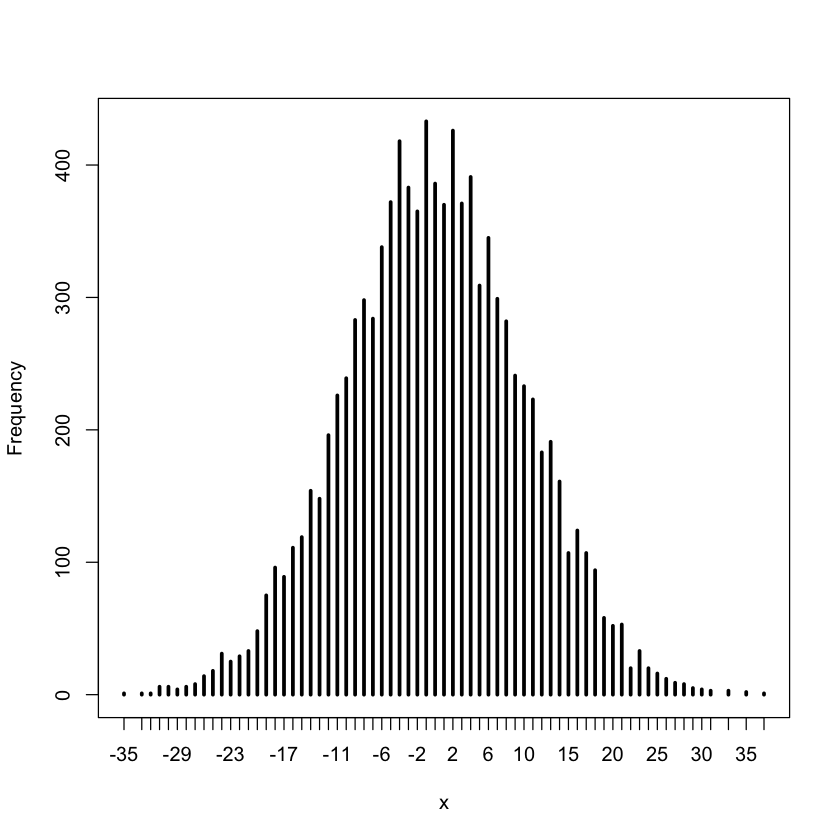

In [3]:
simplehist(mu)

In [4]:
sigma <- rexp(1e4, 1)

In [5]:
y <- rnorm(1e4, mu, sigma)

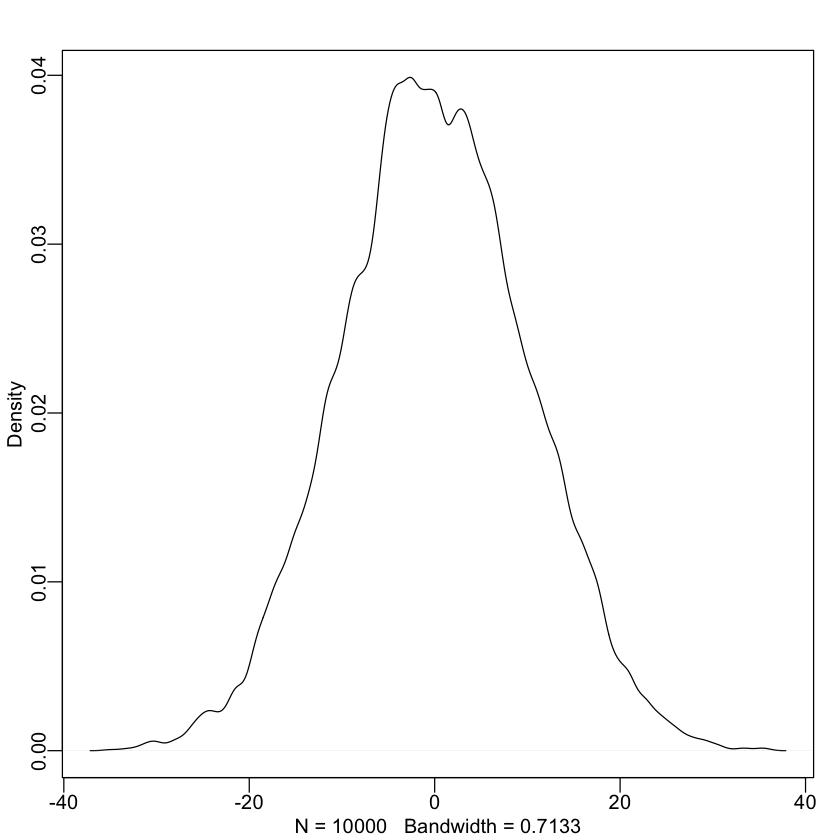

In [6]:
dens(y)

### 4M2.
Translate the model just above into a quap formula.

In [7]:
alist(
        y ~ dnorm(mu, sigma),
        mu ~ dnorm(0, 10),
        sigma ~ dexp(1)
        )

[[1]]
y ~ dnorm(mu, sigma)

[[2]]
mu ~ dnorm(0, 10)

[[3]]
sigma ~ dexp(1)


### 4M3

skipping

### 4M4.

A sample of students is measured for height each year for 3 years. After the third year, you want to fit a linear regression predicting height using year as a predictor. Write down the mathematical
model definition for this regression, using any variable names and priors you choose. Be prepared to
defend your choice of priors.

#### Answer 

assume linear relationship between weight and height

y ~ Normal(mu, sigma^2)

mu ~ a+b(x-xbar)

a ~ normal(170, 20) # estimating the mean being something like 170, give or take 20 which is very generous

b ~ Log-Normal(0,1) # strictly positive 

sigma ~ uniform(0,50) # same as the book


### 4M5. 

Now suppose I remind you that every student got taller each year. Does this information lead
you to change your choice of priors? How?

It does not, I am using Log-Normal, b is strictly positive

### 4M6.
Now suppose I tell you that the variance among heights for students of the same age is never more than 64cm. How does this lead you to revise your priors?

that will lead me me to revise the sigma. This means that the sigma^2 is going to be 64  

### 4M7.

Refit model m4.3 from the chapter, but omit the mean weight xbar this time. Compare the
new model’s posterior to that of the original model. In particular, look at the covariance among the
parameters. What is different? Then compare the posterior predictions of both models.

In [8]:
data(Howell1); d <- Howell1; d2 <- d[d$age >= 18, ]

In [9]:
m4.3 <- quap(
    alist(
        height ~ dnorm(mu, sigma),
        mu <- a + b*(weight), 
        a ~ dnorm(178, 20), 
        b ~ dlnorm(0, 1),
        sigma ~ dunif(0, 50)
        ), data = d2
    )

In [14]:
xbar <- mean(d2$weight)
m4.3_original <- quap(
    alist(
        height ~ dnorm(mu, sigma),
        mu <- a + b*(weight-xbar), 
        a ~ dnorm(178, 20), 
        b ~ dlnorm(0, 1),
        sigma ~ dunif(0, 50)
        ), data = d2
    )

In [10]:
precis(m4.3)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,114.5353871,1.89774445,111.5024249,117.5683492
b,0.8907047,0.04175793,0.8239674,0.9574419
sigma,5.0727071,0.19124787,4.7670560,5.3783581


In [15]:
precis(m4.3_original)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,154.6013700,0.27030766,154.1693661,155.0333738
b,0.9032809,0.04192363,0.8362788,0.9702829
sigma,5.0718808,0.19115477,4.7663786,5.3773831


In [19]:
round(vcov(m4.3), 3)

,a,b,sigma
a,3.601,-0.078,0.009
b,-0.078,0.002,0.000
sigma,0.009,0.000,0.037


In [18]:
round(vcov(m4.3_original), 3)

,a,b,sigma
a,0.073,0.000,0.000
b,0.000,0.002,0.000
sigma,0.000,0.000,0.037


There is now correlation between a and b! This is probably because the original model centred around the mean 

In [24]:
weight.seq <- seq(from=25, to = 70, by = 1)

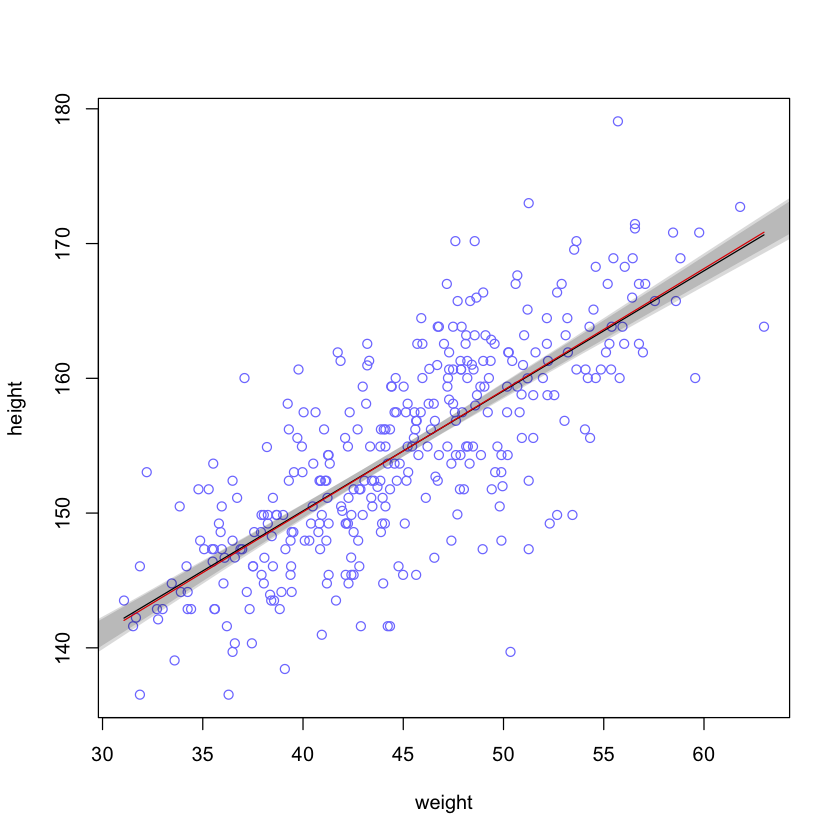

In [44]:
plot(height ~ weight, data = d2, col=rangi2)
post <- extract.samples(m4.3)
a_map <- mean(post$a)
b_map <- mean(post$b)
curve(a_map+b_map*x, add=TRUE)
mu <- link(m4.3, data = data.frame(weight=weight.seq))
mu.PI <- apply(mu, 2, PI, prob=0.89)
shade(mu.PI, weight.seq)

post_original <- extract.samples(m4.3_original)
a_map_original <- mean(post_original$a)
b_map_original <- mean(post_original$b)
curve(a_map_original + b_map_original*(x-xbar), add=TRUE, col='red')
mu_original <- link(m4.3_original, data = data.frame(weight=weight.seq))
mu_original.PI <- apply(mu_original, 2, PI, prob=0.89)
shade(mu_original.PI, weight.seq)


so we are seeing more uncertainty near the intercept than in the middle (mu), in the non-centred case, uncertainty in a is the uncertainty when w = 0 (i.e. towards the end of the intercept), whereas in the centred case, uncertainty for a is the uncertainty when w = xbar, which is small (near the centre) since there's a lot of data around it 

### 4H1.

The weights listed below were recorded in the !Kung census, but heights were not recorded for
these individuals. Provide predicted heights and 89% intervals for each of these individuals. That is,
fill in the table below, using model-based predictions.

| Individual | Weight | Expected height | 89% interval|
|------|------|-------|-----|
|   1  | 46.95|?|?|
|   2  | 43.72|?|?|
|   3  | 64.78|?|?|
|   4  | 32.59|?|?|
|   5  | 54.63|?|?|

In [94]:
xbar

[1] 108.3189

In [91]:
weight = c(46.95, 43.72, 64.78, 32.59, 54.63)

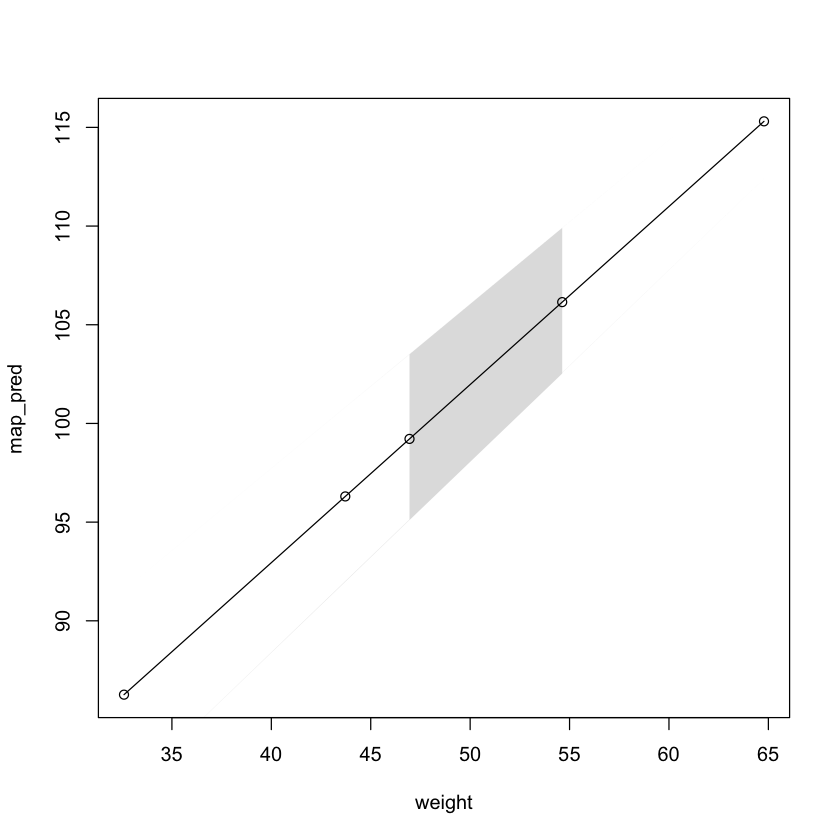

In [92]:
map_pred<- a_map_original+b_map_original*(weight - xbar)
plot(map_pred ~ weight)
curve(a_map_original + b_map_original*(x-xbar), add=TRUE)

mu_original <- link(m4.3_original, data = data.frame(weight=weight))
mu_original.PI <- apply(mu_original, 2, PI, prob=0.89)
shade(mu_original.PI, weight)

sim.height <- sim(m4.3, data = list(weight = weight.seq))
height.HPDI <- apply(sim.height, 2, HPDI, prob = 0.89)
shade(height.HPDI, weight.seq)

In [51]:
mu_original.PI

5%,155.8918,152.9896,171.0662,142.4218,162.5508
94%,156.8148,153.9205,173.8970,144.3847,164.0679


In [53]:
map_pred

[1] 156.3646 153.4498 172.4545 143.4060 163.2951

### 4H2.

Select out all the rows in the Howell1 data with ages below 18 years of age. If you do it right,
you should end up with a new data frame with 192 rows in it.

(a) Fit a linear regression to these data, using quap. Present and interpret the estimates. For
every 10 units of increase in weight, how much taller does the model predict a child gets?

(b) Plot the raw data, with height on the vertical axis and weight on the horizontal axis. Superimpose the MAP regression line and 89% interval for the mean. Also superimpose the 89% interval
for predicted heights.

(c) What aspects of the model fit concern you? Describe the kinds of assumptions you would
change, if any, to improve the model. You don’t have to write any new code. Just explain what the
model appears to be doing a bad job of, and what you hypothesize would be a better model.



In [63]:
d <- Howell1
d3 <- d[ d$age < 18, ]

In [64]:
dim(d3)

[1] 192   4

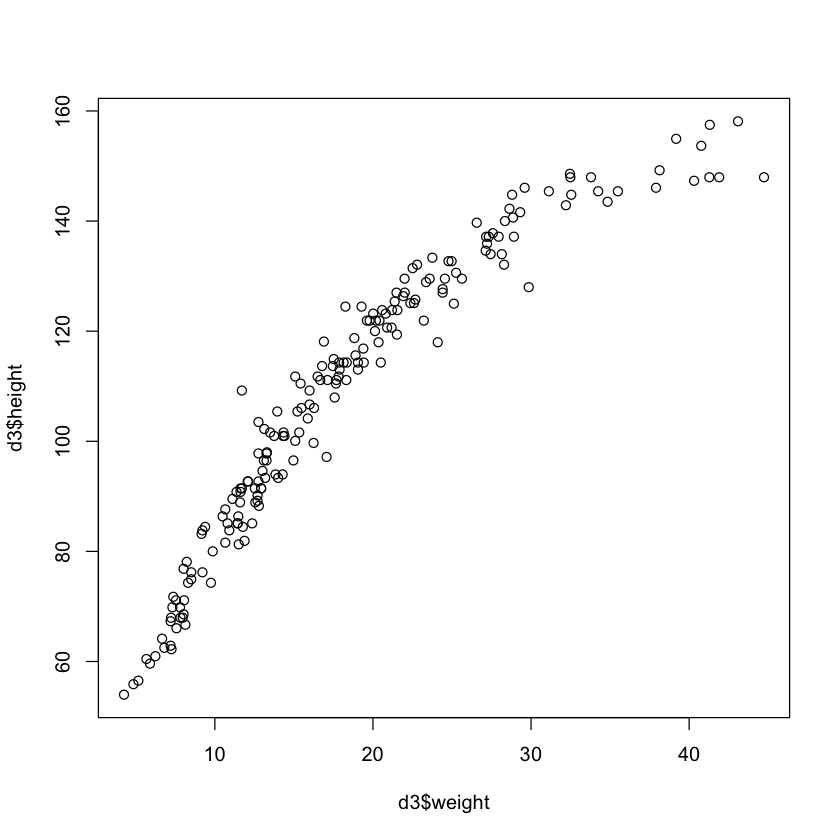

In [66]:
plot(d3$weight, d3$height)

In [67]:
xbar = mean(d3$height)

In [70]:
fit <- quap (
    alist(
        height ~ dnorm(mu, sigma),
        mu <- a + b*(weight), 
        a ~ dnorm(0, 20), 
        b ~ dlnorm(0, 1),
        sigma ~ dunif(0, 50)
        ), data = d3
    )

In [71]:
precis(fit)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,58.010517,1.39443334,55.781943,60.239090
b,2.729121,0.06818995,2.620140,2.838102
sigma,8.437659,0.43063904,7.749415,9.125904


according to this, for every 10 unit of weight increases, the child will increase 27 units

In [72]:
weight = seq(from=0, to = 40, by = 1)

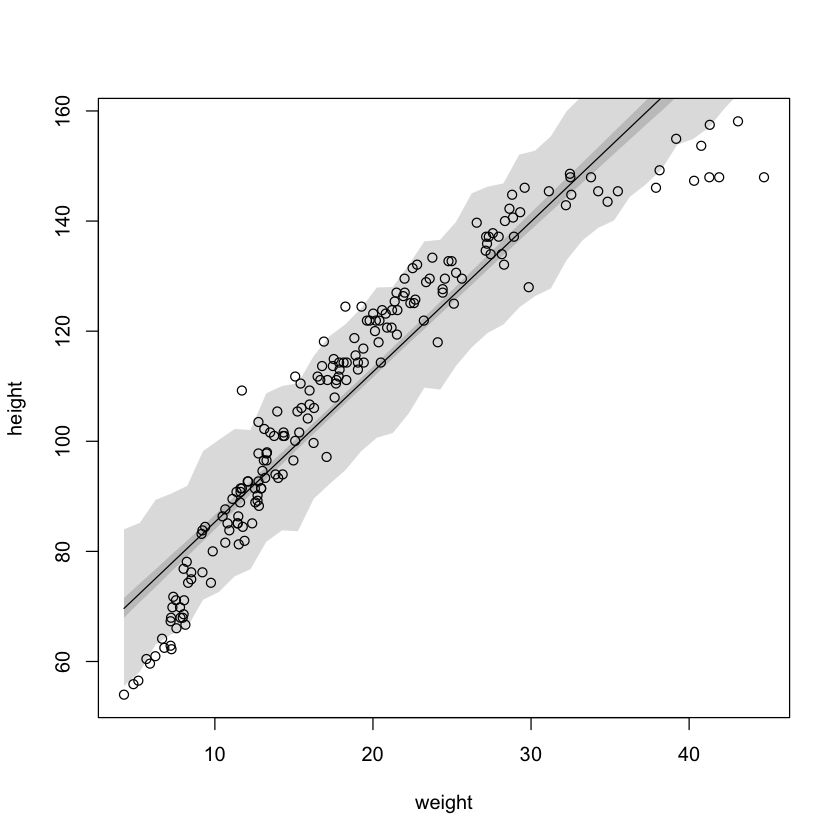

In [87]:
plot(height ~ weight, data = d3)

weight.seq <- seq(from = min(d3$weight), to = max(d3$weight), by = 1)
mu <- link(fit, data = data.frame(weight = weight.seq))
mu.mean <- apply(mu, 2, mean)
mu.HPDI <- apply(mu, 2, HPDI, prob = 0.89)
lines(weight.seq, mu.mean)
shade(mu.HPDI, weight.seq)

sim.height <- sim(fit, data = list(weight = weight.seq))
height.HPDI <- apply(sim.height, 2, HPDI, prob = 0.89)
shade(height.HPDI, weight.seq)

So the error looks huge. What needs to be improved is probably the prior. The model itself is also poorly chosen since it should be non-linear, but instead we chose the linear model  

### 4H3.
Suppose a colleague of yours, who works on allometry, glances at the practice problems just
above. Your colleague exclaims, “That’s silly. Everyone knows that it’s only the logarithm of body
weight that scales with height!” Let’s take your colleague’s advice and see what happens.

(a) Model the relationship between height (cm) and the natural logarithm of weight (log-kg). Use
the entire Howell1 data frame, all 544 rows, adults and non-adults. Can you interpret the resulting
estimates?

(b) Begin with this plot: plot( height ~ weight , data=Howell1 ). Then use samples
from the quadratic approximate posterior of the model in (a) to superimpose on the plot: (1) the
predicted mean height as a function of weight, (2) the 97% interval for the mean, and (3) the 97%
interval for predicted heights

In [97]:
dim(d)

[1] 544   4

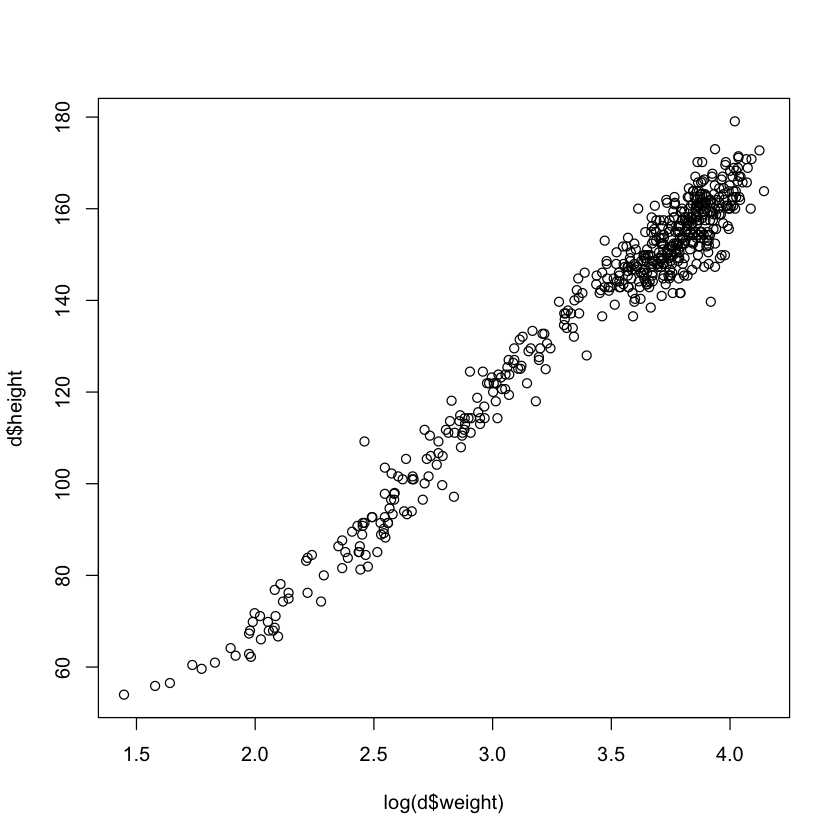

In [98]:
plot(log(d$weight), d$height)

In [121]:
model <- quap (
    alist(
        height ~ dnorm(mu, sigma),
        mu <- a + b*(log(weight)), 
        a ~ dnorm(178, 20), 
        b ~ dnorm(0, 100),
        sigma ~ dunif(0, 50)
        ), data = d
    )

In [130]:
formula <- alist(
  height ~ dnorm(mu, sigma),
  mu <- a + b * log(weight),
  a ~ dnorm(178, 100),
  b ~ dnorm(0, 100),
  sigma ~ dunif(0, 50)
)
m <- quap(formula, data = d)
precis(m, corr = TRUE)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-23.78399,1.3351403,-25.91780,-21.650176
b,47.07523,0.3825523,46.46384,47.686626
sigma,5.13480,0.1556757,4.88600,5.383599


In [134]:
w_seq = seq(from = min(d$weight), to = max(d$weight), by=1)

In [140]:
mu <- link(model, data = data.frame(weight = w_seq))
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI, prob = 0.89)

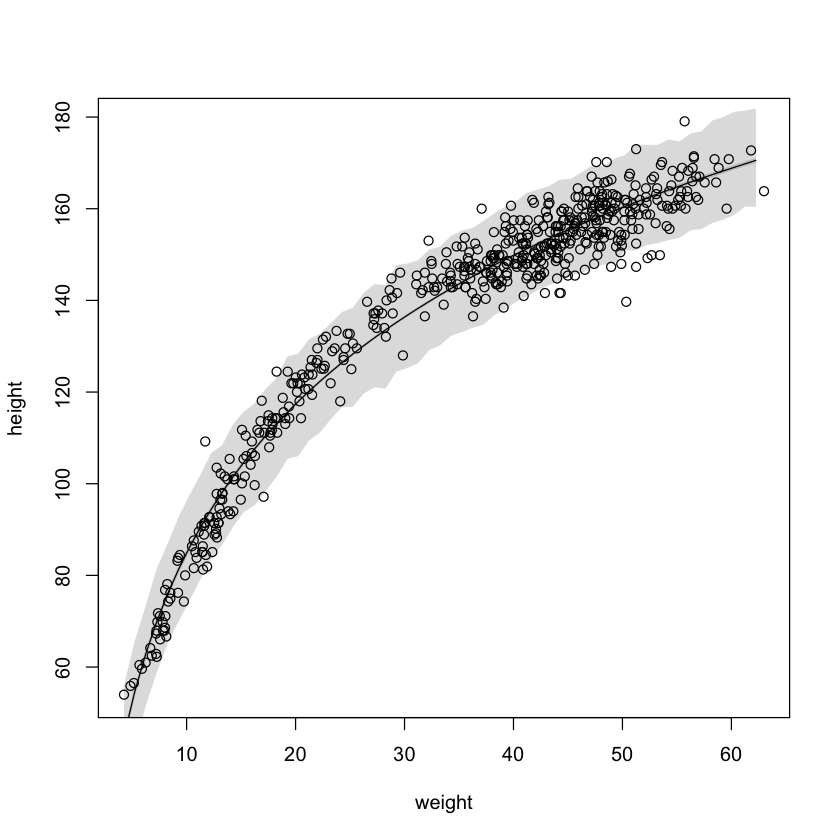

In [144]:
plot(height~weight, data = d)
lines(w_seq, mu.mean)
shade(mu.PI, w_seq)

# Estimate and plot the 89% HPDI for the predicted heights
sim.height <- sim(m, data = list(weight = w_seq))
height.HPDI <- apply(sim.height, 2, HPDI, prob = 0.97)
shade(height.HPDI, w_seq)